# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import libraries necessary for the analysis 
import pandas as pd
import tweepy
import json
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image 
from io import BytesIO
#read the twitter archive data
df_twitter=pd.read_csv(r'C:\Users\phineny95\Desktop\DATA SCIENCE PROJECTS\twitter-archive-enhanced.csv')

In [2]:
#print first 5 rows of the twitter archive data
df_twitter.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#import necessary library to read file programmatically
import requests
import os

In [4]:
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
#creating the request
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

#accessing the content and writing to a file
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
#reading the image predictions data after downloading it programmatically 
df_image=pd.read_csv('image-predictions.tsv',sep='\t')

In [8]:
#print first five rows of the image predictions data
df_image.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [9]:
!pip install -- tweepy

In [10]:
#import necessary library
import tweepy
import json


In [11]:
#reading the text-json txt 
df_list = []
tweet_id=[]
retweet_count=[]
favorite_count =[]

with open(r'C:\Users\phineny95\Desktop\DATA SCIENCE PROJECTS\tweet-json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        df_list.append({'tweet_id':tweet_id,'favorite_likes':favorite_count,'retweets':retweet_count})

In [12]:
#creating a dataframe for the file
df_count= pd.DataFrame(df_list,columns =['tweet_id','favorite_likes','retweets'])

In [13]:
#print first five of the count data
df_count.head()

tweet_id  favorite_likes  retweets
0  892420643555336193           39467      8853
1  892177421306343426           33819      6514
2  891815181378084864           25461      4328
3  891689557279858688           42908      8964
4  891327558926688256           41048      9774

## Assessing Data
This section looks at the following:
- The number of columns,entries, null values and the data types of the various columns of the three datasets.
- It looks for duplicated values for the twitter archive and image prediction dataset.
- It looks at the number of dogs in the various dog stages in the twitter archive dataset.
- It looks at the unique names in the twitter archive dataset.
- It looks at the the 3 predictions in the image prediction dataset to check the number of predictions that are breeds of dogs for each of these 3 predictions.

In [14]:
#checking number of columns, entries, datatype and the number of non null values for each column. 
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
#checking the number of number values in the twitter archive data
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
#the number of dogs in the floofer stage 
df_twitter.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
#the number of dogs in the pupper stage
df_twitter.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
#the number of dogs in the doggo stage
df_twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
#the number of dogs in the puppo stage
df_twitter.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
#unique names in the name column of the twittwer archive
df_twitter.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [21]:
#checking for duplicates
sum(df_twitter.tweet_id.duplicated())

0

In [22]:
#checking number of columns, entries, datatype and the number of non null values 
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#checking the number of prection1 that are breeds of dog
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
#checking the number of prection2 that are breeds of dog
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [25]:
#checking the number of prection3 that are breeds of dog
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [26]:
#checking the number of unique dog breeds of prediction1
df_image.p1.nunique()

378

In [27]:
#checking for duplicates in the image predictions data
sum(df_image.duplicated())

0

In [28]:
#checking number of columns, entries, datatype and the number of non null values 
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_likes  2354 non-null   int64
 2   retweets        2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
#checking for duplicates
sum(df_count.duplicated())

0

### Quality issues
Twitter_archive

- .The data has missing values in some columns

- Retweet columns such as retweet_status_id and retweet_user_id is not relevant for this analysis

- The Name column of the twitter achived data has some wrong names or no names.

- Change the datatype of Tweet id of the 3 datasets to strings.

- Timestamp datatype is in string format

- Some of the rows of the text column are retweets and not original tweets

Image_predictions

- Non descriptive column names in the image prediction data

- Some of the Predictions of the image predicton data are not breeds of dogs 



### Tidiness issues
- Dog stage of the twitter_archive should not be separated into different columns

- All three datasets should be merged

## Cleaning Data
 

- Make a copy of the original data before cleaning.

In [30]:
# Make copies of original pieces of data
df_twitter_new=df_twitter.copy()
df_image_new=df_image.copy()
df_count_new=df_count.copy()

In [31]:
#print the first five rows of the copied twitter archive data for cleaning
df_twitter_new.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

In [32]:
df_image_new.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

In [33]:
df_count_new.head(3)

tweet_id  favorite_likes  retweets
0  892420643555336193           39467      8853
1  892177421306343426           33819      6514
2  891815181378084864           25461      4328

**Define**
- Drop rows in the text columns that have retweets instead of original tweets.


**Code**

In [34]:
#select retweeted_status_id greater than 1 
df_retweets1=df_twitter_new.query('retweeted_status_id > 1')

In [35]:
#check for success
df_retweets1

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp  \
19    2017-07-21 01:02:36 +0000   
32    2017-07-15 02:45:48 +0000   
36    2017-07-13 01:35:06 +0000   
68    2017-06-26 00:13:58 +0000   
73    2017-06-24 00:09:53 +0000   
...                         ...   
1023  2016-06-25 01:52:36 +0000   
1043  2016-06-17 16:01:16 +0000   
1242  2016-03-21 19:31:59 +0000   
2259  2015-11-20 03:51:52 +0000   
2260  2015-11-20 03:51:47 +0000   

                                                 source  \
19    <a href="http://twitter.com/download/iphone" r...   
32    <a href="http://twitter.com/download/iphone" r...   
36    <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
73    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1023  <a href="http://twitter.com/download/iphone" r...   
1043  <a href="http://twitter.com/download/iphone" r...   
1242  <a href="http://twitter.com/download/iphone" r...   
2259  <a href="http://twitter.com" rel="nofollow">Tw...   
2260  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
19    RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...         8.860537e+17   
36    RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
73    RT @dog_rates: Meet Shadow. In an attempt to r...         8.782815e+17   
...                                                 ...                  ...   
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   
1043  RT @dog_rates: Extremely intelligent dog here....         6.671383e+17   
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
2259  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
2260  RT @dogratingrating: Unoriginal idea. Blatant ...         6.675484e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
19                4.196984e+09  2017-07-19 00:47:34 +0000   
32                1.960740e+07  2017-07-15 02:44:07 +0000   
36                4.196984e+09  2017-02-12 01:04:29 +0000   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
73                4.196984e+09  2017-06-23 16:00:04 +0000   
...                        ...                        ...   
1023              4.196984e+09  2015-11-21 00:46:50 +0000   
1043              4.196984e+09  2015-11-19 00:32:12 +0000   
1242              7.832140e+05  2016-03-21 19:29:52 +0000   
2259              4.296832e+09  2015-11-20 03:43:06 +0000   
2260              4.296832e+09  2015-11-20 03:41:59 +0000   

                                          expanded_urls  rating_numerator  \
19    https://twitter.com/dog_rates/status/887473957...                13   
32    https://twitter.com/dog_rates/status/886053434...                12   
36    https://twitter.com/dog_rates/status/830583320...                13   
68    https://twitt

In [36]:
#drop rows with retweets
df_twitter_new.drop(df_retweets1.index,inplace=True)

#### Test

In [37]:
#check for success
df_twitter_new

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

**Define**

Drop the following columns:
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- in_reply_to_status_id
- in_reply_to_user_id

**Code**

In [38]:
#drop the columns containin retweet information
df_twitter_new.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1,inplace=True)

#### Test

In [39]:
#check for success
df_twitter_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


**Define**

- Find and drop rows with wrong names in the copied twitter archive data

**Code**

In [40]:
#find and sort the words the have been entered as names 
wrong_names_mk=df_twitter_new['name'].str.contains('^[a-z]',regex=True)
wrong_names=df_twitter_new[wrong_names_mk].name.value_counts().sort_index()
wrong_names

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [41]:
#drop rows with wrong names in the twitter archive data
wrong_names_index = df_twitter_new[df_twitter_new['name'].str.islower()].index
df_twitter_new.drop(wrong_names_index, inplace= True)

**Test

In [42]:
#check foe success
df_twitter_new

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2342  666082916733198337  2015-11-16 02:38:37 +0000   
2343  666073100786774016  2015-11-16 01:59:36 +0000   
2344  666071193221509120  2015-11-16 01:52:02 +0000   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2342  <a href="http://twitter.com/download/iphone" r...   
2343  <a href="http://twitter.com/download/iphone" r...   
2344  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2342  Here we have a well-established sunblockerspan...   
2343  Let's hope this flight isn't Malaysian (lol). ...   
2344  Here we have a northern speckled Rhododendron....   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2342  https://twitter.com/dog_rates/status/666082916...                 6   
2343  https://twitter.com/dog_rates/status/666073100...                10   
2344  https://twitter.com/dog_rates/status/666071193...                 9   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  
0                     10   Phineas  None    None   None  None  
1                     10     Tilly  None    None   None  None  
2                     10    Archie  None    None   None  None  
3                     10     Darla  None    None   None  None  
4                     10  Franklin  None    None   None  None  
...                  ...       ...   ...     ...    ...   ...  
2342                  10      None  None    None   None  None  
2343                  10      None  None    None   None  None  
2344                  10      None  None    None   None  None  
2351                  10      None  None    None   None  None  
2355                  10      None  None    None   None  None  

[2071 rows x 12 columns]

**Define**

Replace all 'None' in the doggo,floofer,pupper and puppo columns with null

**Code**

In [43]:
#replace none in columns with null value
df_twitter_new.doggo.replace('None',np.nan, inplace=True)
df_twitter_new.floofer.replace('None',np.nan, inplace=True)
df_twitter_new.pupper.replace('None',np.nan, inplace=True)
df_twitter_new.puppo.replace('None',np.nan, inplace=True)

**Test**

In [44]:
#check for success
df_twitter_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2071 non-null   int64 
 1   timestamp           2071 non-null   object
 2   source              2071 non-null   object
 3   text                2071 non-null   object
 4   expanded_urls       2013 non-null   object
 5   rating_numerator    2071 non-null   int64 
 6   rating_denominator  2071 non-null   int64 
 7   name                2071 non-null   object
 8   doggo               84 non-null     object
 9   floofer             10 non-null     object
 10  pupper              222 non-null    object
 11  puppo               25 non-null     object
dtypes: int64(3), object(9)
memory usage: 210.3+ KB


**Define**

- Melt or merge the doggo,pupper,floofer and puppo columns together to create a new column called dog_stage.
- Replace empty spaces in the dog stage column with Nan.
- Drop the doggo,pupper,floofer and puppo columns after melting them into one new column.

**Code**

In [45]:
#melt the 8th to 10th columns together to form a new column.
df_twitter_new['dog_stage']=df_twitter_new[df_twitter_new.columns[8:]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [46]:
#replace empty spaces in the dog_stage column with null values
df_twitter_new.dog_stage.replace('',np.nan, inplace=True)

In [47]:
#replace two entries with a single entry combined from the two entries
df_twitter_new['dog_stage'].replace('doggo,pupper','doggo-pupper',inplace=True)
df_twitter_new['dog_stage'].replace('doggo,puppo','doggo-puppo',inplace=True)
df_twitter_new['dog_stage'].replace('doggo,floofer','doggo-floofer',inplace=True)

In [48]:
#number of dogs in the various dog stages
df_twitter_new.dog_stage.value_counts()

pupper           213
doggo             73
puppo             24
floofer            9
doggo-pupper       9
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

In [49]:
#Drop the pupper,puppo,doggo and floofer columns
df_twitter_new.drop(['pupper','doggo','puppo','floofer'],axis=1, inplace=True)

**Test**

In [50]:
df_twitter_new

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2342  666082916733198337  2015-11-16 02:38:37 +0000   
2343  666073100786774016  2015-11-16 01:59:36 +0000   
2344  666071193221509120  2015-11-16 01:52:02 +0000   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2342  <a href="http://twitter.com/download/iphone" r...   
2343  <a href="http://twitter.com/download/iphone" r...   
2344  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2342  Here we have a well-established sunblockerspan...   
2343  Let's hope this flight isn't Malaysian (lol). ...   
2344  Here we have a northern speckled Rhododendron....   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2342  https://twitter.com/dog_rates/status/666082916...                 6   
2343  https://twitter.com/dog_rates/status/666073100...                10   
2344  https://twitter.com/dog_rates/status/666071193...                 9   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name dog_stage  
0                     10   Phineas       NaN  
1                     10     Tilly       NaN  
2                     10    Archie       NaN  
3                     10     Darla       NaN  
4                     10  Franklin       NaN  
...                  ...       ...       ...  
2342                  10      None       NaN  
2343                  10      None       NaN  
2344                  10      None       NaN  
2351                  10      None       NaN  
2355                  10      None       NaN  

[2071 rows x 9 columns]

In [51]:
#change the tweet_id columns in the three datasets into string datatype
df_twitter_new['tweet_id']=df_twitter_new['tweet_id'].astype(str)
df_image_new['tweet_id']=df_image_new['tweet_id'].astype(str)
df_count_new['tweet_id']=df_count_new['tweet_id'].astype(str)

**Define**

Change datatype of timestamp from string

**Code**

In [52]:
#Change datatype of timestamp from string
df_twitter_new['timestamp'] = pd.to_datetime(df_twitter_new.timestamp)
df_twitter_new.rename(columns={ 'timestamp' : 'twitter_date'}, inplace = True )

In [53]:
#check for success
df_twitter_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2071 non-null   object             
 1   twitter_date        2071 non-null   datetime64[ns, UTC]
 2   source              2071 non-null   object             
 3   text                2071 non-null   object             
 4   expanded_urls       2013 non-null   object             
 5   rating_numerator    2071 non-null   int64              
 6   rating_denominator  2071 non-null   int64              
 7   name                2071 non-null   object             
 8   dog_stage           330 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 161.8+ KB


**Dfine**

Some of the predictions are not dog breeds therefore drop rows whe in the image predictions data that are not dog breeds.
- Drop rows with p1_dog,p2_dog and p3_dog all equal to False

**Code**

In [54]:
#Drop rows with p1_dog,p2_dog and p3_dog all equal to False
df_not_dogs=df_image_new[(df_image_new['p1_dog']==False) & (df_image_new['p2_dog']== False ) & (df_image_new['p3_dog']== False) ]
df_not_dogs

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
...                  ...                                                ...   
2021  880935762899988482    https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   
2022  881268444196462592    https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6           1        box_turtle  0.933012   False       mud_turtle  0.045885   
17          1               hen  0.965932   False             cock  0.033919   
18          1  desktop_computer  0.086502   False             desk  0.085547   
21          1  three-toed_sloth  0.914671   False            otter  0.015250   
25          1        guinea_pig  0.996496   False            skunk  0.002402   
...       ...               ...       ...     ...              ...       ...   
2021        1       street_sign  0.251801   False         umbrella  0.115123   
2022        1            tusker  0.473303   False  Indian_elephant  0.245646   
2046        1       convertible  0.738995   False       sports_car  0.139952   
2052        1         limousine  0.130432   False        tow_truck  0.029175   
2074        1            orange  0.097049   False            bagel  0.085851   

      p2_dog              p3   p3_conf  p3_dog  
6      False        terrapin  0.017885   False  
17     False       partridge  0.000052   False  
18     False        bookcase  0.079480   False  
21     False  great_grey_owl  0.013207   False  
25     False         hamster  0.000461   False  
...      ...             ...       ...     ...  
2021   False   traffic_light  0.069534   False  
2022   False            ibex  0.055661   False  
2046   False       car_wheel  0.044173   False  
2052   False   shopping_cart  0.026321   False  
2074   False          banana  0.076110   False  

[324 rows x 12 columns]

In [55]:
#drop queried dataframe from the main image dataframe
df_image_new.drop(df_not_dogs.index, inplace= True)

**Test**

In [56]:
#check for success
df_not_dogs1=df_image_new[(df_image_new['p1_dog']==False)]

In [57]:
df_not_dogs1

tweet_id                                          jpg_url  \
8     666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
22    666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
33    666430724426358785  https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
43    666776908487630848  https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
52    666996132027977728  https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg   
...                  ...                                              ...   
1984  872122724285648897  https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg   
1992  873697596434513921  https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg   
2013  879376492567855104  https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg   
2026  882045870035918850  https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   

      img_num             p1   p1_conf  p1_dog                  p2   p2_conf  \
8           1  shopping_cart  0.962465   False     shopping_basket  0.014594   
22          1             ox  0.416669   False        Newfoundland  0.278407   
33          1          llama  0.505184   False       Irish_terrier  0.104109   
43          1      seat_belt  0.375057   False  miniature_pinscher  0.167175   
52          1            hay  0.507637   False          Rottweiler  0.062490   
...       ...            ...       ...     ...                 ...       ...   
1984        1     basketball  0.808396   False                 pug  0.066736   
1992        1         laptop  0.153718   False      French_bulldog  0.099984   
2013        1       tricycle  0.663601   False  Labrador_retriever  0.033496   
2026        1       web_site  0.949591   False               dhole  0.017326   
2071        1    paper_towel  0.170278   False  Labrador_retriever  0.168086   

      p2_dog                p3   p3_conf  p3_dog  
8      False  golden_retriever  0.007959    True  
22      True       groenendael  0.102643    True  
33      True             dingo  0.062071   False  
43      True         Chihuahua  0.086951    True  
52      True     water_buffalo  0.048425   False  
...      ...               ...       ...     ...  
1984    True         dalmatian  0.054570    True  
1992    True           printer  0.077130   False  
2013    True          Pembroke  0.018827    True  
2026   False  golden_retriever  0.006941    True  
2071    True           spatula  0.040836   False  

[219 rows x 12 columns]

**Define**

Make the column names of the image predictions data more descriptive
>img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog will be changed to
Image_number,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog, 
prediction3,prediction3_confidence,prediction3_dog,

**Code**

In [58]:
#Replace column names with descriptive names
df_image_new.rename(columns={'img_num':'Image_number','p1':'prediction1','p1_conf':'prediction1_confidence',
                             'p1_dog':'prediction1_dog', 'p2':'prediction2','p2_conf':'prediction2_confidence',
                             'p2_dog':'prediction2_dog','p3':'prediction3','p3_conf':'prediction3_confidence',
                             'p3_dog':'prediction3_dog'},inplace=True)

**Test**

In [59]:
#Check for success
df_image_new.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   Image_number             prediction1  prediction1_confidence  \
0             1  Welsh_springer_spaniel                0.465074   
1             1                 redbone                0.506826   
2             1         German_shepherd                0.596461   

   prediction1_dog         prediction2  prediction2_confidence  \
0             True              collie                0.156665   
1             True  miniature_pinscher                0.074192   
2             True            malinois                0.138584   

   prediction2_dog          prediction3  prediction3_confidence  \
0             True    Shetland_sheepdog                0.061428   
1             True  Rhodesian_ridgeback                0.072010   
2             True           bloodhound                0.116197   

   prediction3_dog  
0             True  
1             True  
2             True

**Define**

Merge the cleaned twitter archive data, image predictions data and count data to form a master dataset.

**Code**

In [60]:
#Merge cleaned twitter archive and count dataset
df=df_twitter_new.merge(df_count_new, on='tweet_id', how='left')

In [61]:
#merge the two already merged dataset with the image predictions dataset
df_main=df.merge(df_image_new, on='tweet_id', how='left')

**Test**

In [62]:
#Check for success
df_main.head()

tweet_id              twitter_date  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  favorite_likes  ...  Image_number  \
0                  10   Phineas       NaN           39467  ...           NaN   
1                  10     Tilly       NaN           33819  ...           1.0   
2                  10    Archie       NaN           25461  ...           1.0   
3                  10     Darla       NaN           42908  ...           1.0   
4                  10  Franklin       NaN           41048  ...           2.0   

   prediction1  prediction1_confidence prediction1_dog         prediction2  \
0          NaN                     NaN             NaN                 NaN   
1    Chihuahua                0.323581            True            Pekinese   
2    Chihuahua                0.716012            True            malamute   
3  paper_towel                0.170278           False  Labrador_retriever   
4       basset                0.555712            True    English_springer   

  prediction2_confidence prediction2_dog                  prediction3  \
0                    NaN             NaN                          NaN   
1               0.090647            True                     papillon   
2               0.078253            True                       kelpie   
3               0.168086            True                      spatula   
4               0.225770            True  German_short-haired_pointer   

  prediction3_confidence prediction3_dog  
0                    NaN             NaN  
1               0.068957            True  
2               0.031379            True  
3               0.040836           False  
4               0.175219            True  

[5 rows x 22 columns]

In [63]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                2071 non-null   object             
 1   twitter_date            2071 non-null   datetime64[ns, UTC]
 2   source                  2071 non-null   object             
 3   text                    2071 non-null   object             
 4   expanded_urls           2013 non-null   object             
 5   rating_numerator        2071 non-null   int64              
 6   rating_denominator      2071 non-null   int64              
 7   name                    2071 non-null   object             
 8   dog_stage               330 non-null    object             
 9   favorite_likes          2071 non-null   int64              
 10  retweets                2071 non-null   int64              
 11  jpg_url                 1606 non-null   obj

In [64]:
# select rows with null prediction1 column
df_main1=df_main.query('prediction1 != prediction1')

In [65]:
#drop selected rows with prediction1
df_main.drop(df_main1.index, inplace= True)

In [66]:
#check for success
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 1 to 2070
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1606 non-null   object             
 1   twitter_date            1606 non-null   datetime64[ns, UTC]
 2   source                  1606 non-null   object             
 3   text                    1606 non-null   object             
 4   expanded_urls           1606 non-null   object             
 5   rating_numerator        1606 non-null   int64              
 6   rating_denominator      1606 non-null   int64              
 7   name                    1606 non-null   object             
 8   dog_stage               250 non-null    object             
 9   favorite_likes          1606 non-null   int64              
 10  retweets                1606 non-null   int64              
 11  jpg_url                 1606 non-null   obj

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
df_main.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [68]:
df_main.describe()

rating_numerator  rating_denominator  favorite_likes      retweets  \
count       1606.000000         1606.000000     1606.000000   1606.000000   
mean          11.522416           10.541096     9419.225405   2865.452055   
std            8.196295            7.044177    12635.795074   4851.550964   
min            0.000000            7.000000       81.000000     16.000000   
25%           10.000000           10.000000     2287.250000    673.500000   
50%           11.000000           10.000000     4534.000000   1473.500000   
75%           12.000000           10.000000    12107.750000   3307.500000   
max          165.000000          150.000000   132810.000000  79515.000000   

       Image_number  prediction1_confidence  prediction2_confidence  \
count   1606.000000             1606.000000             1606.000000   
mean       1.222291                0.606121                0.136506   
std        0.584132                0.267459                0.101145   
min        1.000000                0.044333                0.000010   
25%        1.000000                0.376910                0.054806   
50%        1.000000                0.606701                0.120899   
75%        1.000000                0.857077                0.197860   
max        4.000000                0.999984                0.467678   

       prediction3_confidence  
count             1606.000000  
mean                 0.061337  
std                  0.052205  
min                  0.000001  
25%                  0.015491  
50%                  0.049227  
75%                  0.094813  
max                  0.273419

**Obeservations and insights**

- The maximum number of likes in this data is 132,810 lilke
- The average number of likes is approximately 9,419 likes
- The minimum number of likes is 81 likes
- The maximum number of retweets is 79515 retweets
- The average number of retweets is approximately 2865 retweets
- The minimum number of retweets is 16 retweets
- The highest number of images in a tweet is 4 with minimum being 1
- The highest prediction confidence of prediction1 is 0.999984 with average 0.606121
- The highest prediction confidence of prediction2 is 0.467678 with average 0.136506

### Visualization

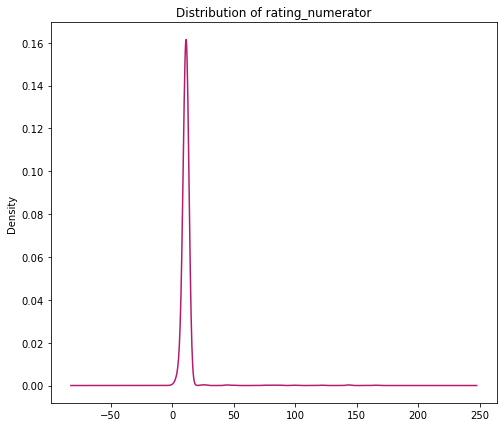

In [69]:
#plot the distribution of rating_numerator
plt.title('Distribution of rating_numerator')
df_main.rating_numerator.plot(kind='density',figsize=(8,7),color='#B41D6C');

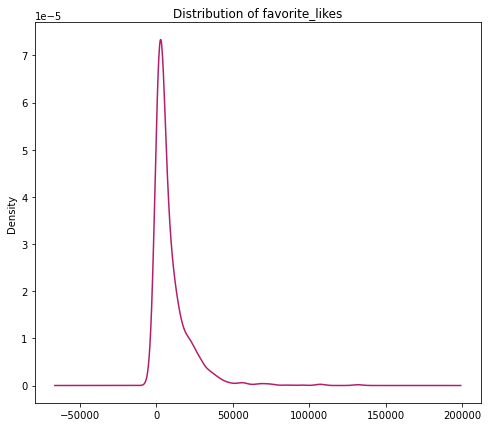

In [70]:
#plot the distribution of favorite_likes
plt.title('Distribution of favorite_likes')
df_main.favorite_likes.plot(kind='density',figsize=(8,7),color='#B41D6C');

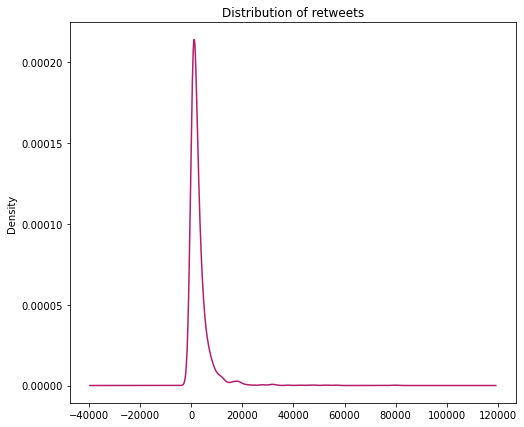

In [71]:
#plot the distribution of retweets
plt.title('Distribution of retweets')
df_main.retweets.plot(kind='density',figsize=(8,7),color='#B41D6C');

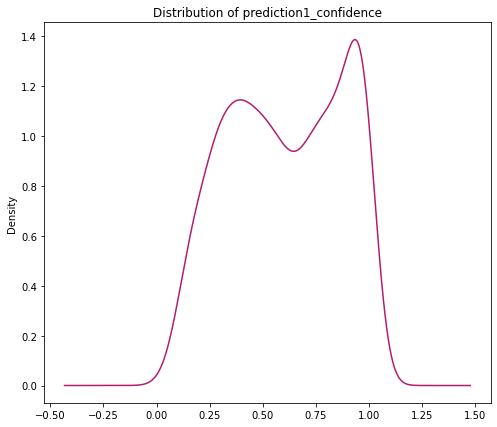

In [72]:
#plot the distribution of prediction1_confidence
plt.title('Distribution of prediction1_confidence')
df_main.prediction1_confidence.plot(kind='density',figsize=(8,7),color='#B41D6C');

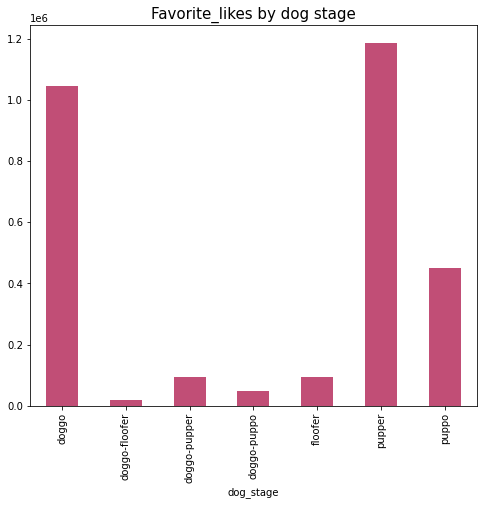

In [73]:
#plot the favorite_likes by dog stage
plt.title("Favorite_likes by dog stage",fontsize=15)
df_main.groupby('dog_stage')['favorite_likes'].sum().plot(kind='bar',figsize=(8,7),color="#C14E76");

**Observations**
- The dog stage with the highest likes is the pupper stage follwed by doggo stage being the stage with the second highest likes.
- Doggo-floofers have the least likes with the doggo-puppo having the second least likes

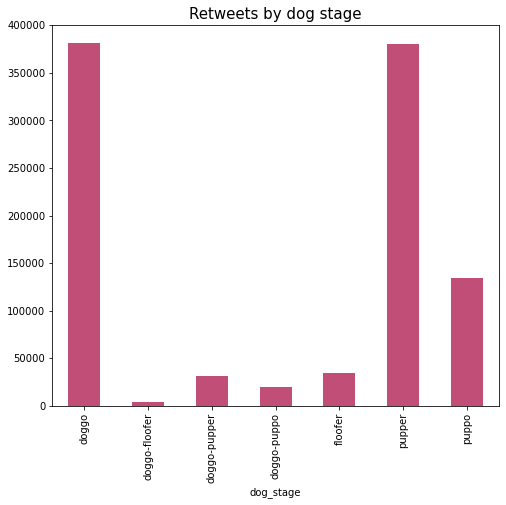

In [74]:
#plot the retweets by dog stage
plt.title("Retweets by dog stage",fontsize=15)
df_main.groupby('dog_stage')['retweets'].sum().plot(kind='bar',figsize=(8,7),color="#C14E76");

**Observations**
- The doggo and pupper stages have the most retweets .
- The doggo-floofer and doggo-puppo stages have the least retweets.

In [75]:
#select 5 rows with the highest likes
df_mostliked=df_main.nlargest(5,['favorite_likes'])

In [76]:
df_mostliked

tweet_id              twitter_date  \
342  822872901745569793 2017-01-21 18:26:02+00:00   
842  744234799360020481 2016-06-18 18:26:18+00:00   
61   879415818425184262 2017-06-26 19:07:24+00:00   
439  807106840509214720 2016-12-09 06:17:20+00:00   
117  866450705531457537 2017-05-22 00:28:40+00:00   

                                                source  \
342  <a href="http://twitter.com/download/iphone" r...   
842  <a href="http://twitter.com/download/iphone" r...   
61   <a href="http://twitter.com/download/iphone" r...   
439  <a href="http://twitter.com/download/iphone" r...   
117  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
342  Here's a super supportive puppo participating ...   
842  Here's a doggo realizing you can stand in a po...   
61   This is Duddles. He did an attempt. 13/10 some...   
439  This is Stephan. He just wants to help. 13/10 ...   
117  This is Jamesy. He gives a kiss to every other...   

                                         expanded_urls  rating_numerator  \
342  https://twitter.com/dog_rates/status/822872901...                13   
842  https://twitter.com/dog_rates/status/744234799...                13   
61   https://twitter.com/dog_rates/status/879415818...                13   
439  https://twitter.com/dog_rates/status/807106840...                13   
117  https://twitter.com/dog_rates/status/866450705...                13   

     rating_denominator     name dog_stage  favorite_likes  ...  Image_number  \
342                  10     None     puppo          132810  ...           1.0   
842                  10     None     doggo          131075  ...           1.0   
61                   10  Duddles       NaN          107956  ...           1.0   
439                  10  Stephan       NaN          107015  ...           1.0   
117                  10   Jamesy    pupper          106827  ...           2.0   

            prediction1  prediction1_confidence prediction1_dog  \
342    Lakeland_terrier                0.196015            True   
842  Labrador_retriever                0.825333            True   
61     English_springer                0.383404            True   
439           Chihuahua                0.505370            True   
117      French_bulldog                0.905334            True   

            prediction2 prediction2_confidence prediction2_dog    prediction3  \
342  Labrador_retriever               0.160329            True  Irish_terrier   
842            ice_bear               0.044681           False        whippet   
61          Boston_bull               0.134967            True       Cardigan   
439          Pomeranian               0.120358            True    toy_terrier   
117         Boston_bull               0.078060            True            pug   

    prediction3_confidence prediction3_dog  
342               0.069126            True  
842               0.018442            True  
61                0.110481            True  
439               0.077008            True  
117               0.001771            True  

[5 rows x 22 columns]

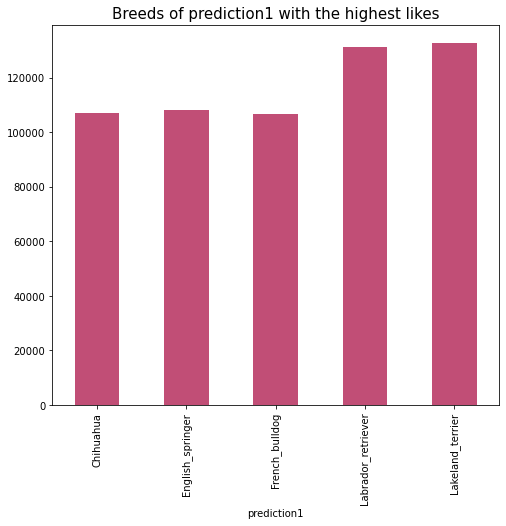

In [77]:
#plot the first 5 breeds with most likes
plt.title("Breeds of prediction1 with the highest likes",fontsize=15)
df_mostliked.groupby('prediction1')['favorite_likes'].sum().plot(kind='bar',figsize=(8,7),color="#C14E76");

**Observation**
- Lakeland terrier breed from prediction1 has the most likes with 132,810 likes.
- Labrador retriever breed is the second most liked breed with 131,075 likes.
- English springer is the third most liked breed with 107,956 likes.
- Chihuahua is the fourth most like breed with 107,015 likes.
- French bulldog is the fifth most like breed with 106,827 likes.

### TOP 5 DOGS

- **MOST LIKED 1#**


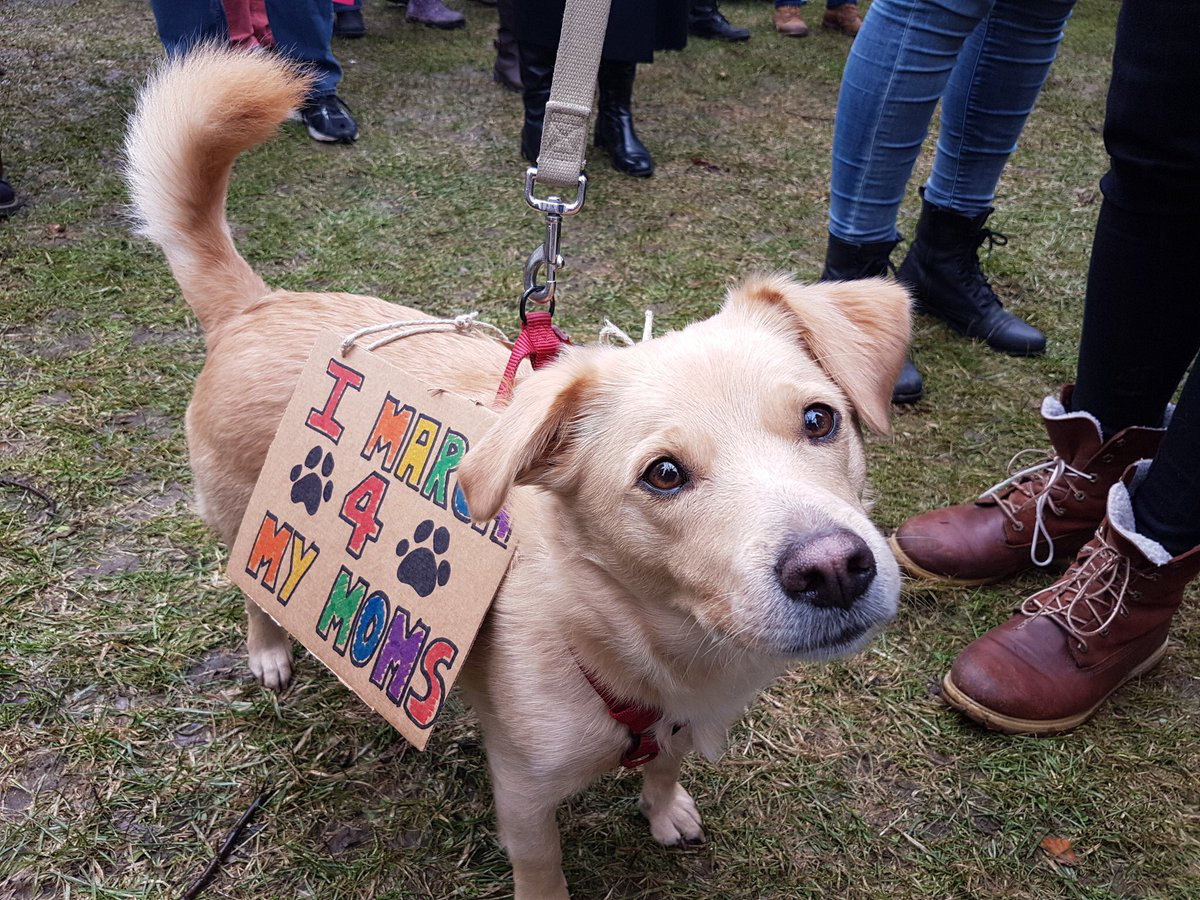

In [78]:
url = df_mostliked.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

- **MOST LIKED 2#**

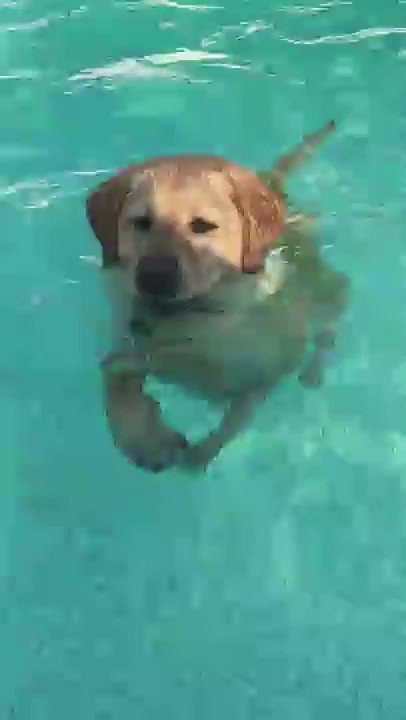

In [79]:
url = df_mostliked.jpg_url.iloc[1]
r = requests.get(url)
Image.open(BytesIO(r.content))

- **MOST LIKED 3#**

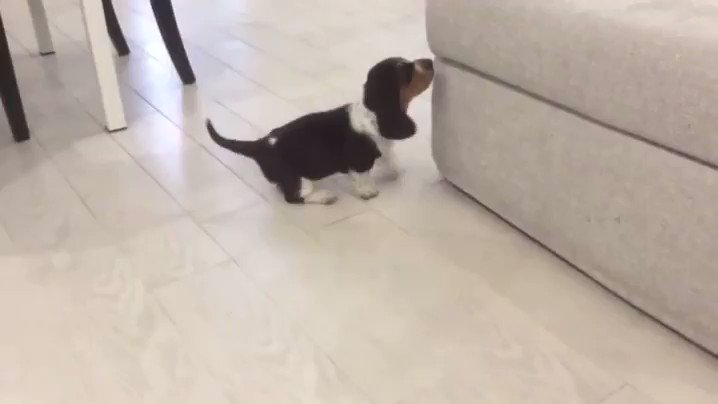

In [81]:
url = df_mostliked.jpg_url.iloc[2]
r = requests.get(url)
Image.open(BytesIO(r.content))

- **MOST LIKED 4#**

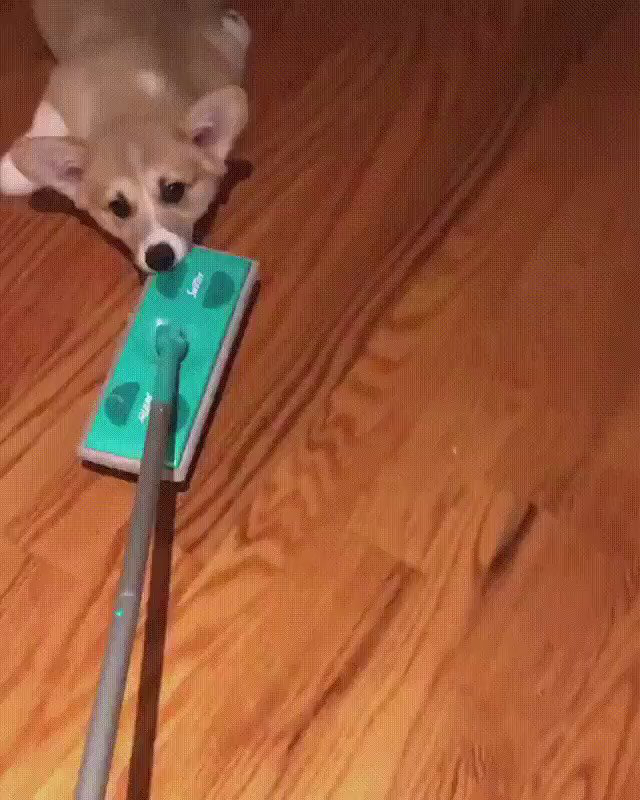

In [82]:
url = df_mostliked.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

- **MOST LIKED 5#**

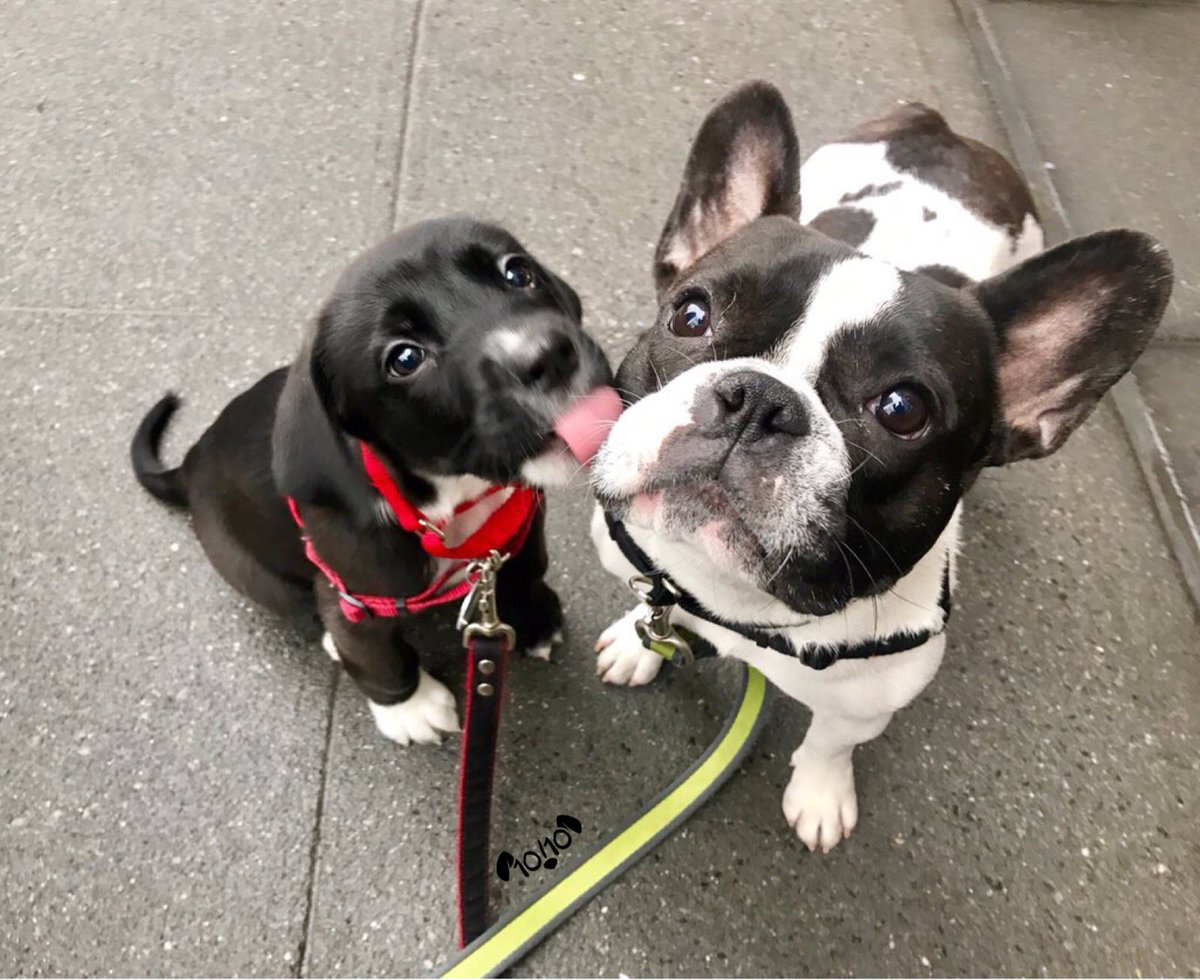

In [83]:
url = df_mostliked.jpg_url.iloc[4]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [84]:
df_mostliked.groupby('prediction1')['retweets'].sum()

prediction1
Chihuahua             56625
English_springer      45849
French_bulldog        32883
Labrador_retriever    79515
Lakeland_terrier      48265
Name: retweets, dtype: int64

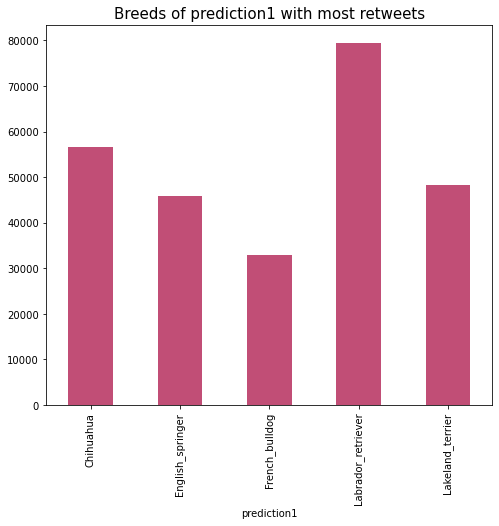

In [85]:
##plot the first 5 breeds with most retweets
plt.title("Breeds of prediction1 with most retweets",fontsize=15)
df_mostliked.groupby('prediction1')['retweets'].sum().plot(kind='bar',figsize=(8,7),color="#C14E76");

**Observations**
- Labrador retriever has the most retweets with 79515 retweets.
- chihuahua has the second highest retweets with 56625 retweets.
- Lakeland terrier has the third highest retweets with 48265 retweets.
- English springer has the fourth highest retweets with 45849 retweets.
- French bulldog has the fifth highest retweets with 32883 retweets.

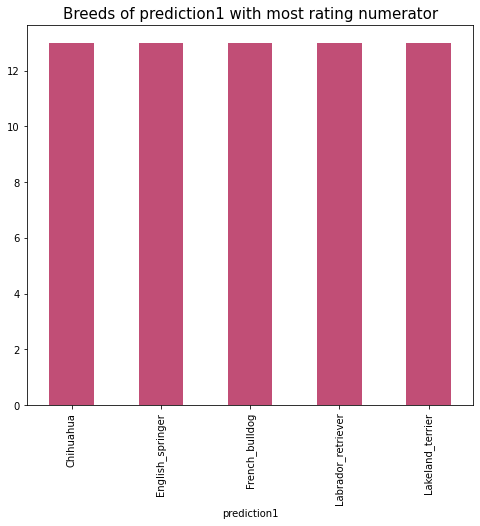

In [86]:
# plot the breeds of prediction1 with most rating numerator
plt.title("Breeds of prediction1 with most rating numerator",fontsize=15)
df_mostliked.groupby('prediction1')['rating_numerator'].sum().plot(kind='bar',figsize=(8,7),color="#C14E76");

- The Top 5 breeds from prediction1 has a rating numerator of 13.

In [87]:
df_mostliked.groupby('dog_stage')['retweets'].sum()

dog_stage
doggo     79515
pupper    32883
puppo     48265
Name: retweets, dtype: int64

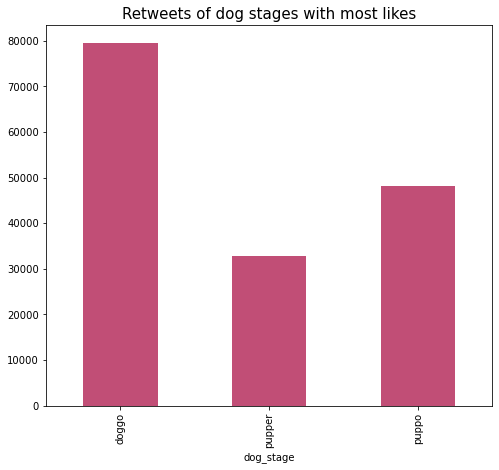

In [88]:
#plot the retweets of dog stages with most likes
plt.title("Retweets of dog stages with most likes",fontsize=15)
df_mostliked.groupby('dog_stage')['retweets'].sum().plot(kind='bar',figsize=(8,7),color="#C14E76");

**Observation**
- The top three dog stages with most retweets are:
   - doggo with 79515 retweets
   - puppo with 48265 retweets
   - pupper with 32883 retweets


In [89]:
df_mostliked.groupby('dog_stage')['favorite_likes'].sum()

dog_stage
doggo     131075
pupper    106827
puppo     132810
Name: favorite_likes, dtype: int64

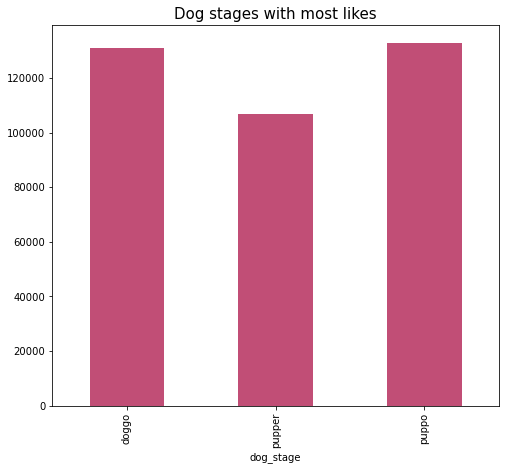

In [90]:
#plot the Dog stages with most likes
plt.title("Dog stages with most likes",fontsize=15)
df_mostliked.groupby('dog_stage')['favorite_likes'].sum().plot(kind='bar',figsize=(8,7),color="#C14E76");

**Observation**
- The top three dog stages with most likes are:
  - puppo with 132,810 likes
  - doggo with 131,075 likes
  - pupper with 106,827 likes


In [91]:
#select first 5 rows of with the smallest likes
df_lessliked=df_main.nsmallest(5,['favorite_likes'])

In [92]:
df_lessliked.groupby('prediction1')['favorite_likes'].sum()

prediction1
English_setter             81
curly-coated_retriever    107
miniature_pinscher        111
pug                       121
toy_terrier               129
Name: favorite_likes, dtype: int64

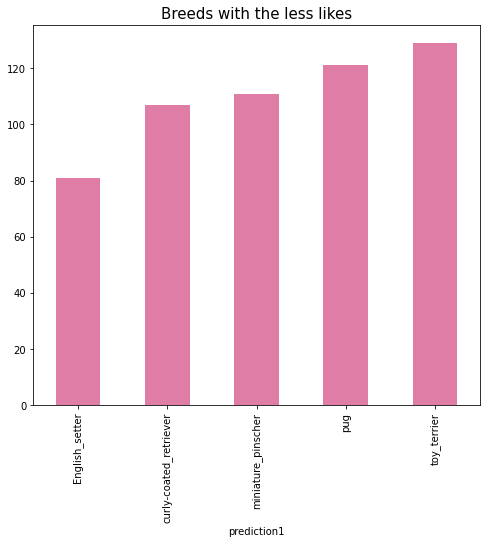

In [93]:
#plot the Breeds with the less likes from the prediction1
plt.title("Breeds with the less likes",fontsize=15)
df_lessliked.groupby('prediction1')['favorite_likes'].sum().plot(kind='bar',figsize=(8,7),color="#DF7DA6");

**Observation**
- The five dog breeds from prediction1 with less likes are:
   - English_setter with the least likes i.e 81 likes
   - Curly-coated_retriever with  107 likes
   - Miniature_pinscher with 111 likes
   - Pug with 121 likes
   - Toy_terrier with 129 likes

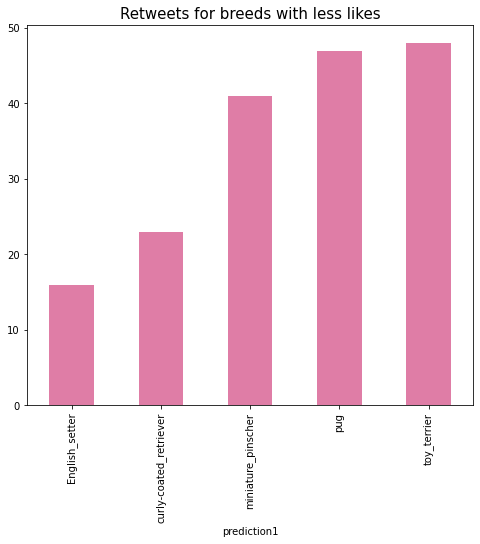

In [94]:
#plot the number of retweets for breeds from prediction1 with less likes 
plt.title("Retweets for breeds with less likes",fontsize=15)
df_lessliked.groupby('prediction1')['retweets'].sum().plot(kind='bar',figsize=(8,7),color="#DF7DA6");

In [95]:
df_lessliked.groupby('prediction1')['rating_numerator'].sum()

prediction1
English_setter            11
curly-coated_retriever     9
miniature_pinscher         5
pug                        6
toy_terrier               10
Name: rating_numerator, dtype: int64

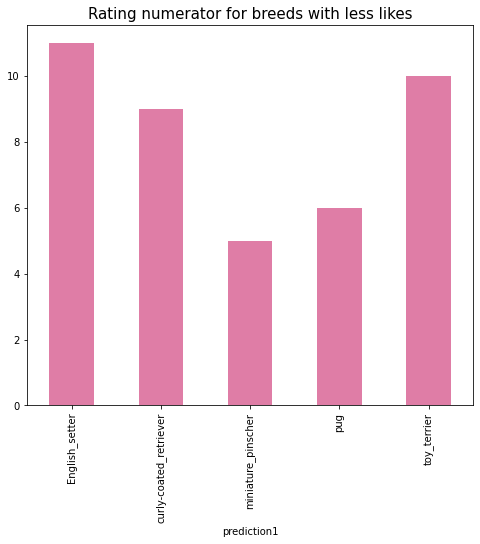

In [96]:
#plot the rating numerator for breeds with less like
plt.title("Rating numerator for breeds with less likes",fontsize=15)
df_lessliked.groupby('prediction1')['rating_numerator'].sum().plot(kind='bar',figsize=(8,7),color="#DF7DA6");

- The rating numerators of breeds from predictor1 with less likes are:
   - English_setter with 11
   - Toy_terrier with 10
   - Curly-coated_retriever with 9
   - Pug with 6
   - Miniature_pinscher with 5
  
   
    

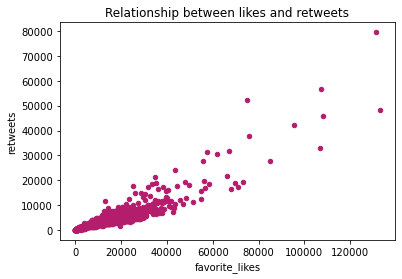

In [97]:
#plot the relationship between likes and retweets
df_main.plot(x='favorite_likes',y='retweets',kind='scatter',color='#B41D6C').set(title='Relationship between likes and retweets');

**Observation**
- There is a positive correlation between retweets and likes however it does not necessitate causaton.

References
- Stack Overflow
- Slack data analyst channel
- geeksforgeeks.org
- Documentation